In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn.manifold import TSNE
 
import warnings
warnings.filterwarnings('ignore')

In [2]:
tracks = pd.read_csv('../../dataset.csv')
tracks.head(2)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,...,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic


In [3]:
tracks.shape

(114000, 21)

In [4]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [5]:
# Limpeza de Dados
# A limpeza de dados é uma das etapas mais importantes, sem a qual os dados seriam inúteis, 
# pois os dados brutos contêm muitos ruídos que precisam ser removidos. Caso contrário, as observações
# feitas a partir deles serão imprecisas e, se formos construir um modelo com esses dados, seu desempenho também será ruim. 
# As etapas incluídas na limpeza de dados são a remoção de outliers, imputação de valores nulos e correção da assimetria dos dados

In [6]:
tracks.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

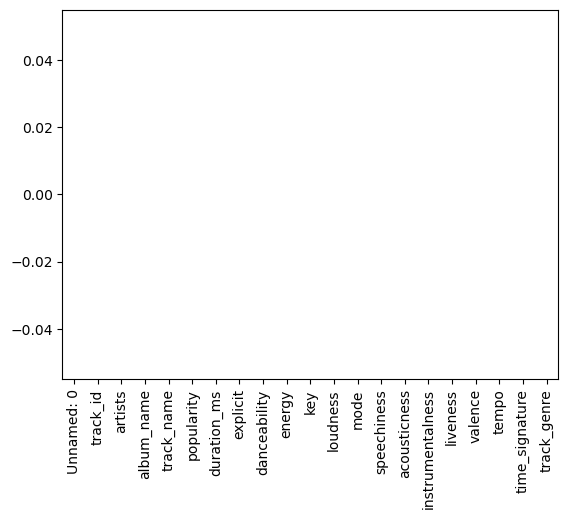

In [7]:
tracks.dropna(inplace = True)
tracks.isnull().sum().plot.bar()
plt.show()

In [8]:
tracks = tracks.drop(['track_id'], axis = 1)

In [9]:
model = TSNE(n_components = 2, random_state = 0)
tsne_data = model.fit_transform(tracks.head(500))
plt.figure(figsize = (7, 7))
plt.scatter(tsne_data[:,0], tsne_data[:,1])
plt.show()

ValueError: could not convert string to float: 'Gen Hoshino'

In [10]:
#Como sabemos, várias versões da mesma música são lançadas, por isso precisamos remover as diferentes versões da mesma música, 
#já que estamos construindo um sistema de recomendação baseado em conteúdo, no qual a principal função utilizada é a similaridade cosseno. 
#Nosso sistema recomendará as versões da mesma música se estiverem disponíveis, e isso não é o que queremos.

In [11]:
tracks['track_name'].nunique(), tracks.shape

(73608, (113999, 20))

In [ ]:
#Então, nossa preocupação estava correta. Vamos remover as linhas duplicadas com base nos nomes das músicas.

In [ ]:
tracks = tracks.sort_values(by=['popularity'], ascending=False)
tracks.drop_duplicates(subset=['track_name'], keep='first', inplace=True)

In [ ]:
plt.figure(figsize = (10, 5))
sb.countplot(tracks['popularity'])
plt.axis('off')
plt.show()

In [ ]:
# Visualizar a Distribuição de Popularidade: Se o objetivo é entender o impacto das músicas em termos de popularidade,
# você pode criar um gráfico que mostre a distribuição da popularidade das músicas.


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) 
plt.hist(tracks['popularity'], bins=30, edgecolor='black')
plt.title('Distribuição da Popularidade das Músicas')
plt.xlabel('Popularidade')
plt.ylabel('Número de Músicas')
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
sb.histplot(tracks['popularity'], bins=30, kde=True, color='blue')
plt.title('Distribuição da Popularidade das Músicas')
plt.xlabel('Popularidade')
plt.ylabel('Número de Músicas')
plt.show()

In [ ]:
# Visualizar a Distribuição de Duração das Músicas: Você pode criar um gráfico para ver como as durações das músicas estão distribuídas.

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(tracks['duration_ms'], bins=30, edgecolor='black')
plt.title('Distribuição da Duração das Músicas')
plt.xlabel('Duração (ms)')
plt.ylabel('Número de Músicas')
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
sb.histplot(tracks['duration_ms'], bins=30, kde=True, color='green')
plt.title('Distribuição do Tempo de Duração das Músicas')
plt.xlabel('Duração (ms)')
plt.ylabel('Número de Músicas')
plt.show()

In [ ]:
#Tempo Médio das Músicas (duration_ms): Você pode visualizar a distribuição do tempo de duração das músicas.

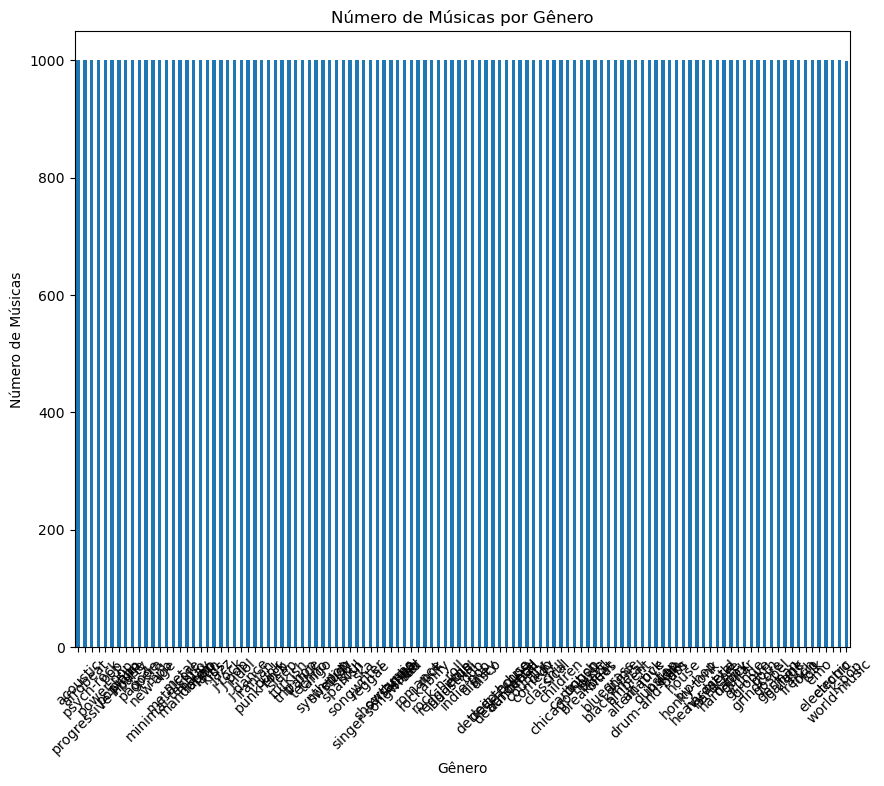

In [12]:
genre_counts = tracks['track_genre'].value_counts()

# Visualizar o número de músicas por gênero
plt.figure(figsize=(10, 8))
genre_counts.plot(kind='bar')
plt.title('Número de Músicas por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Músicas')
plt.xticks(rotation=45)
plt.show()

In [ ]:
genre_counts = tracks['track_genre'].value_counts().reset_index()
genre_counts.columns = ['track_genre', 'count']

# Visualizar o número de músicas por gênero usando um gráfico de barras
plt.figure(figsize=(10, 8))
sb.barplot(x='count', y='track_genre', data=genre_counts, palette='viridis')
plt.title('Número de Músicas por Gênero')
plt.xlabel('Número de Músicas')
plt.ylabel('Gênero')
plt.show()

In [ ]:
floats = []
for col in tracks.columns:
  if tracks[col].dtype == 'float':
    floats.append(col)
 
len(floats)

In [ ]:
#Há um total de 10 colunas com valores em ponto flutuante no dataset. 
#Vamos criar um gráfico de distribuição para cada uma dessas colunas para obter insights sobre a distribuição dos dados.

plt.subplots(figsize = (15, 5))
for i, col in enumerate(floats):
    plt.subplot(2, 5, i + 1)
    sb.distplot(tracks[col])
    #sb.histplot(tracks[col])

plt.tight_layout()
plt.show()

In [ ]:
float_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Criar uma visualização para cada coluna
plt.figure(figsize=(15, 15))
for i, column in enumerate(float_columns, 1):
    plt.subplot(5, 2, i)  # Ajuste o número de linhas e colunas conforme necessário
    sb.histplot(tracks[column], kde=True, color='blue')
    plt.title(f'Distribuição de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

In [ ]:
#Algumas das características têm distribuição normal, enquanto a distribuição de alguns dados é inclinada.

In [142]:
%%capture
#song_vectorizer = CountVectorizer()
#song_vectorizer.fit(tracks['track_genre'])
song_vectorizer = TfidfVectorizer()
song_vectorizer.fit(tracks['track_name'])  # Ajusta o TF-IDF no gênero das músicas


In [13]:
# Como o conjunto de dados é muito grande, o custo de computação/tempo seria muito alto. 
#Portanto, mostraremos a implementação do sistema de recomendação utilizando as 10.000 músicas mais populares.
tracks = tracks.sort_values(by=['popularity'], ascending=False).head(20000)

In [14]:
print(tracks['track_name'])

20001                 Unholy (feat. Kim Petras)
81051                 Unholy (feat. Kim Petras)
51664     Quevedo: Bzrp Music Sessions, Vol. 52
89411                                La Bachata
81210                           I'm Good (Blue)
                          ...                  
63367                                   決戦スピリット
70495                                       第一次
63358                                      星が泳ぐ
70491                                     再也沒有你
110379                                Gratitude
Name: track_name, Length: 20000, dtype: object


In [18]:

# %%capture
# song_vectorizer = CountVectorizer()
# song_vectorizer.fit(tracks['track_name'])

#Abaixo está uma função auxiliar para calcular as similaridades da música de entrada com cada música no conjunto de dados.
def get_similarities2(song_name, data):

# Getting vector for the input song.
    text_array1 = song_vectorizer.transform(data[data['track_name']== song_name]['track_genre']).toarray()
    num_array1 = data[data['track_name']==song_name].select_dtypes(include=np.number).to_numpy()

# We will store similarity for each row of the dataset.
    sim = []
    for idx, row in data.iterrows():
    	name = row['track_name']
    	
    	# Getting vector for current song.
    	text_array2 = song_vectorizer.transform(data[data['track_name']==name]['track_genre']).toarray()
    	num_array2 = data[data['track_name']==name].select_dtypes(include=np.number).to_numpy()
    
    	# Calculating similarities for text as well as numeric features
    	text_sim = cosine_similarity(text_array1, text_array2)[0][0]
    	num_sim = cosine_similarity(num_array1, num_array2)[0][0]
    	sim.append(text_sim + num_sim)
    	
    return sim


In [23]:
# Para calcular a similaridade entre os dois vetores, usamos o conceito de similaridade cosseno.
def recommend_songs(song_name, data=tracks):
# Base case
    if tracks[tracks['track_name'] == song_name].shape[0] == 0:
    	print('This song is either not so popular or you\
    	have entered invalid_name.\n Some songs you may like:\n')
    	
    	for song in data.sample(n=5)['track_name'].values:
        	print(song)
        	return
    
    data['similarity_factor'] = get_similarities(song_name, data)
    
    data.sort_values(by=['similarity_factor', 'popularity'],
    				ascending = [False, False],
    				inplace=True)
    
    # First song will be the input song itself as the similarity will be highest.
    display(data[['track_name', 'artists']][2:7])


In [24]:
def get_similarities1(song_name, data):
    # Obtém o vetor para a música de entrada
    text_array1 = song_vectorizer.transform(data[data['track_name'] == song_name]['track_genre']).toarray()
    if text_array1.size == 0:
        text_array1 = np.zeros((1, text_array1.shape[1]))  # Vetor zero se a música não for encontrada
    
    num_array1 = data[data['track_name'] == song_name].select_dtypes(include=np.number).mean().values.reshape(1, -1)
    if num_array1.size == 0:
        num_array1 = np.zeros((1, data.select_dtypes(include=np.number).shape[1]))  # Vetor zero se a música não tiver dados numéricos
    
    # Normaliza os dados numéricos
    scaler = StandardScaler()
    data_num = data.select_dtypes(include=np.number)
    data_num_scaled = scaler.fit_transform(data_num.fillna(0))  # Normaliza com valores nulos preenchidos por 0

    sim = []
    for idx, row in data.iterrows():
        name = row['track_name']
        
        # Obtém o vetor para a música atual
        text_array2 = song_vectorizer.transform(data[data['track_name'] == name]['track_genre']).toarray()
        if text_array2.size == 0:
            text_array2 = np.zeros((1, text_array1.shape[1]))  # Vetor zero se a música não for encontrada
        
        num_array2 = data[data['track_name'] == name].select_dtypes(include=np.number).mean().values.reshape(1, -1)
        if num_array2.size == 0:
            num_array2 = np.zeros((1, data_num_scaled.shape[1]))  # Vetor zero se a música não tiver dados numéricos

        # Calcula as similaridades para características textuais e numéricas
        text_sim = cosine_similarity(text_array1, text_array2)[0][0]
        num_sim = cosine_similarity(num_array1, num_array2)[0][0]
        
        sim.append((name, text_sim + num_sim))
        
    # Ordena as músicas pela similaridade em ordem decrescente
    return sorted(sim, key=lambda x: x[1], reverse=True)

In [26]:

def get_similarities(song_name, data):
    # Obtém o vetor TF-IDF para a música de entrada
    text_array1 = song_vectorizer.transform(data[data['track_name'] == song_name]['track_genre']).toarray()
    if text_array1.size == 0:
        text_array1 = np.zeros((1, song_vectorizer.get_feature_names_out().shape[0]))  # Vetor zero se a música não for encontrada
    
    num_array1 = data[data['track_name'] == song_name].select_dtypes(include=np.number).mean().values.reshape(1, -1)
    if num_array1.size == 0:
        num_array1 = np.zeros((1, data.select_dtypes(include=np.number).shape[1]))  # Vetor zero se a música não tiver dados numéricos
    
    # Normaliza os dados numéricos
    scaler = StandardScaler()
    data_num = data.select_dtypes(include=np.number)
    data_num_scaled = scaler.fit_transform(data_num.fillna(0))  # Normaliza com valores nulos preenchidos por 0

    sim = []
    for idx, row in data.iterrows():
        name = row['track_name']
        
        # Obtém o vetor TF-IDF para a música atual
        text_array2 = song_vectorizer.transform(data[data['track_name'] == name]['track_genre']).toarray()
        if text_array2.size == 0:
            text_array2 = np.zeros((1, song_vectorizer.get_feature_names_out().shape[0]))  # Vetor zero se a música não for encontrada
        
        num_array2 = data[data['track_name'] == name].select_dtypes(include=np.number).mean().values.reshape(1, -1)
        if num_array2.size == 0:
            num_array2 = np.zeros((1, data_num_scaled.shape[1]))  # Vetor zero se a música não tiver dados numéricos

        # Calcula as similaridades para características textuais e numéricas
        text_sim = cosine_similarity(text_array1, text_array2)[0][0]
        num_sim = cosine_similarity(num_array1, num_array2)[0][0]
        
        sim.append((name, text_sim + num_sim))
        
    # Ordena as músicas pela similaridade em ordem decrescente
    return sorted(sim, key=lambda x: x[1], reverse=True)

In [28]:
# Agora é hora de ver o sistema de recomendação em ação. Vamos verificar quais músicas o sistema de recomendação sugerirá se o usuário ouvir a famosa música
# "Shape of You".
recommend_songs('imagine')

NameError: name 'song_vectorizer' is not defined

In [77]:
# Aplicando Isso à Música:
#Nome da Música: Se você está procurando por músicas semelhantes com base no nome, o sistema verifica se há músicas 
#com nomes parecidos. Mas, no código que você mostrou, a similaridade não é baseada apenas no nome,
# mas também em como as músicas são descritas.

# Gênero da Música: O sistema também olha para as características das músicas, como o gênero (pop, rock, jazz, etc.).
#Ele compara essas características entre músicas para ver quais são mais semelhantes. 
#Por exemplo, se você gosta de uma música pop animada, o sistema tentará encontrar outras músicas que também sejam pop
#e animadas.

In [122]:
recommend_songs('imagine')

,track_name,artists
103200,Ivy,Frank Ocean
38746,I Wanna Be Your Dog - 2019 Remaster,The Stooges
71819,Spiders,System Of A Down
21100,Essence (feat. Justin Bieber & Tems),Wizkid;Justin Bieber;Tems
31774,Billie Bossa Nova,Billie Eilish


In [48]:
recommend_songs('Love Someone')


,track_name,artists
11391,Penny Lane - Remastered 2009,The Beatles
98065,imagine,Ben Platt
65283,SNEAKERS,ITZY
79076,"Rocket Man (I Think It's Going To Be A Long, L...",Elton John
81163,Dusk Till Dawn (feat. Sia) - Radio Edit,ZAYN;Sia


In [ ]:
# Abaixo está o caso em que o nome da música inserido está incorreto.

In [ ]:
recommend_songs('the')

In [63]:
music_names = [
    "Green Tea & Honey", 
    "Only The Team (with Lil Mosey & Lil Tjay)", 
    "Oh Penne", 
    "Waiting", 
    "Grow As We Go"
]

# Calcula as similaridades com "Shape of You"
similarities = get_similarities("Envolver", tracks)

# Filtra as similaridades para as músicas fornecidas
similar_songs = [song for song in similarities if song[0] in music_names]

# Exibe os resultados
for song in similar_songs:
    print(f"Música: {song[0]}, Similaridade: {song[1]}")


Música: Oh Penne, Similaridade: 0.9999769840198938
Música: Waiting, Similaridade: 0.997963255795846
Música: Green Tea & Honey, Similaridade: 0.9926718697970387
Música: Grow As We Go, Similaridade: 0.9829942730673293
Música: Only The Team (with Lil Mosey & Lil Tjay), Similaridade: 0.9806584053527467


In [65]:
music_names = [
    "Green Tea & Honey", 
    "Only The Team (with Lil Mosey & Lil Tjay)", 
    "Oh Penne", 
    "Waiting", 
    "Grow As We Go"
]


# Filtra o dataset para incluir apenas as músicas da lista
filtered_tracks = tracks[tracks['track_name'].isin(music_names)]

# Exibe os gêneros para essas músicas
for index, row in filtered_tracks.iterrows():
    print(f"Música: {row['track_name']}, Gênero: {row['track_genre']}")

Música: Green Tea & Honey, Gênero: chill
Música: Only The Team (with Lil Mosey & Lil Tjay), Gênero: latino
Música: Oh Penne, Gênero: hip-hop
Música: Waiting, Gênero: house
Música: Grow As We Go, Gênero: show-tunes
